In [39]:
import numpy as np
import astropy.constants as const
import matplotlib.pyplot as plt


In [108]:
%matplotlib inline

In [20]:
def find_L(M): #Masa zvezde
    return const.L_sun.value * (M/const.M_sun.value)**(3.9)

In [19]:
def find_S_eff(T, array, T_sun = 5780): #Efektivna temperatura zvezde i niz iz modela (objasnjeno kasnije)
    T_diff = T - T_sun
    S_eff = 0
    for i in range(len(kasting_inner)):
        S_eff += array[i]*T_diff**i
        
    return S_eff

In [27]:
def find_distance(L, S_eff): #Luminoznost zvezde i njen efektivni fluks
    return np.sqrt((L/const.L_sun.value)/S_eff)

In [22]:
def distance(M, T, array): # wrapper
    L = find_L(M)
    S_eff = find_S_eff(T, array)
    d = find_distance(L, S_eff)
    return d

Kasting -> model iz 1993e 

Kopparapu -> model iz 2013e

x_inner nam daje potrebne konstatne modela za donju, a x_outer gornju granicu za nastanjivu zonu (HZ (habbital zone))

Date konstante koristimo pri racunanju efektivnog fluksa maticne zvezde:

Seff = Seff⊕ + aT∗ + bT2∗ + cT3∗ + dT4∗

x_bound[0] je modelirani efektivni fluks sunca za neku granicu

ostali clanovi odgovaraju konstantama (koeficijentima apsorpcije) a .. d 

T∗ = T - T_sunce, razlika efektivne temperature maticne zvezde i sunca (5780K)

In [16]:
kasting_inner = [1.7753, 1.4316e-4, 2.9875e-9, -7.57e-12, -1.16e-15]
kasting_outer = [0.3179, 5.45e-05, 1.53e-09, -2.78e-12, -4.90e-16]

In [90]:
##FIXME
##FIXME
##FIXME

kopparapu_inner = [1.0512, 1.32E-04, 1.54E-08, -7.99E-12, -1.83E-15]
kopparapu_outer = [0.3438, 5.89E-05, 1.66E-09, -3.00E-12, -5.30E-16]

Radimo nalazenje HZ na primeru maticne zvezde Kepler-102

In [23]:
M_K102 = 0.81*const.M_sun.value
Teff_K102 = 4909 #K 

In [28]:
HZ_kasting_inner = distance(M_K102, Teff_K102, kasting_inner)
HZ_kasting_outer = distance(M_K102, Teff_K102, kasting_outer)

In [29]:
HZ_kasting_inner

0.5150592678644004

In [30]:
HZ_kasting_outer

1.2686687202467322

In [80]:
kepler_102_planets = [0.042, 0.052, 0.105, 0.198, 0.079]
kepler_102_labels  = ["Kepler-102 b", "Kepler-102 c", "Kepler-102 d", "Kepler-102 e", "Kepler-102 f"]
kepler_102_colors  = ['midnightblue', 'darkviolet', 'fuchsia', 'chocolate', 'firebrick']

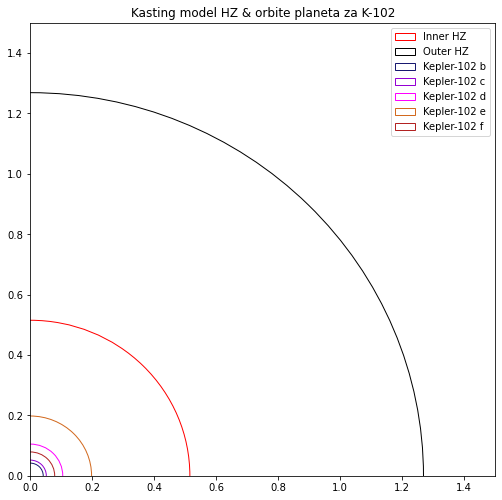

In [117]:
circle1 = plt.Circle((0,0), radius = HZ_kasting_inner, color = 'red', fill = False, label = 'Inner HZ')
circle2 = plt.Circle((0,0), radius = HZ_kasting_outer, fill = False, label = 'Outer HZ')
circles = []

for i in range(len(kepler_102_planets)):
    circles.append(plt.Circle((0,0), radius = kepler_102_planets[i], color = kepler_102_colors[i], fill = False, label = kepler_102_labels[i]))
    
fig, ax = plt.subplots(figsize = (800/96, 800/96))
ax.set_xlim((0, 1.5))
ax.set_ylim((0, 1.5))
ax.set_title('Kasting model HZ & orbite planeta za K-102')
ax.add_patch(circle1)
ax.add_patch(circle2)
for i in range(len(kepler_102_planets)):
    ax.add_patch(circles[i])
plt.legend()
fig.savefig('Kasting.jpg')

In [95]:
HZ_kopparapu_inner = distance(M_K102, Teff_K102, kopparapu_inner)
HZ_kopparapu_outer = distance(M_K102, Teff_K102, kopparapu_outer)

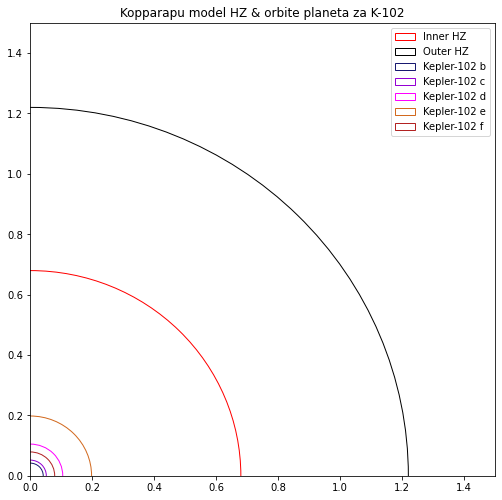

In [116]:
circle1 = plt.Circle((0,0), radius = HZ_kopparapu_inner, color = 'red', fill = False, label = 'Inner HZ')
circle2 = plt.Circle((0,0), radius = HZ_kopparapu_outer, fill = False, label = 'Outer HZ')
circles = []

for i in range(len(kepler_102_planets)):
    circles.append(plt.Circle((0,0), radius = kepler_102_planets[i], color = kepler_102_colors[i], fill = False, label = kepler_102_labels[i]))
    
fig, ax = plt.subplots(figsize = (800/96, 800/96))
ax.set_xlim((0, 1.5))
ax.set_ylim((0, 1.5))
ax.set_title('Kopparapu model HZ & orbite planeta za K-102')
ax.add_patch(circle1)
ax.add_patch(circle2)
for i in range(len(kepler_102_planets)):
    ax.add_patch(circles[i])
plt.legend()
fig.savefig('Kopparapu.jpg')

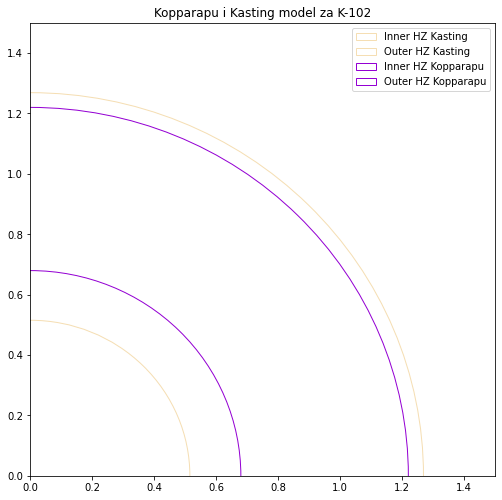

In [119]:
circle1 = plt.Circle((0,0), radius = HZ_kasting_inner, color = 'wheat', fill = False, label = 'Inner HZ Kasting')
circle2 = plt.Circle((0,0), radius = HZ_kasting_outer, color = 'wheat', fill = False, label = 'Outer HZ Kasting')

circle3 = plt.Circle((0,0), radius = HZ_kopparapu_inner, color = 'darkviolet', fill = False, label = 'Inner HZ Kopparapu')
circle4 = plt.Circle((0,0), radius = HZ_kopparapu_outer, color = 'darkviolet', fill = False, label = 'Outer HZ Kopparapu')

fig, ax = plt.subplots(figsize = (800/96, 800/96))
ax.set_xlim((0, 1.5))
ax.set_ylim((0, 1.5))
ax.set_title('Kopparapu i Kasting model za K-102')
ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(circle3)
ax.add_patch(circle4)
plt.legend()
fig.savefig('Komparativno.jpg')